In [74]:
import os
import tarfile
from six.moves import urllib

#the root url for downloading the dataset
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"

#create a local directory ~/datasets/housing and name it as HOUSING_PATH
HOUSING_PATH = os.path.join("datasets", "housing")

#build the downloading url for the housing.tgz file, 
#this should not relate to HOUSING_PATH although they have the same name
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    #if housing_path is not a directory(does not exist), create one
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    #create a target download path for the housing.tgz
    tgz_path = os.path.join(housing_path, "housing.tgz")
    #request the housing.tgz from the housing_url and save it at tgz_path
    urllib.request.urlretrieve(housing_url, tgz_path)
    #open the housing.tgz file and extract all of its content to the housing_path 
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    #close the tgz
    housing_tgz.close()

In [75]:
fetch_housing_data()

In [76]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [77]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [78]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [79]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [80]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


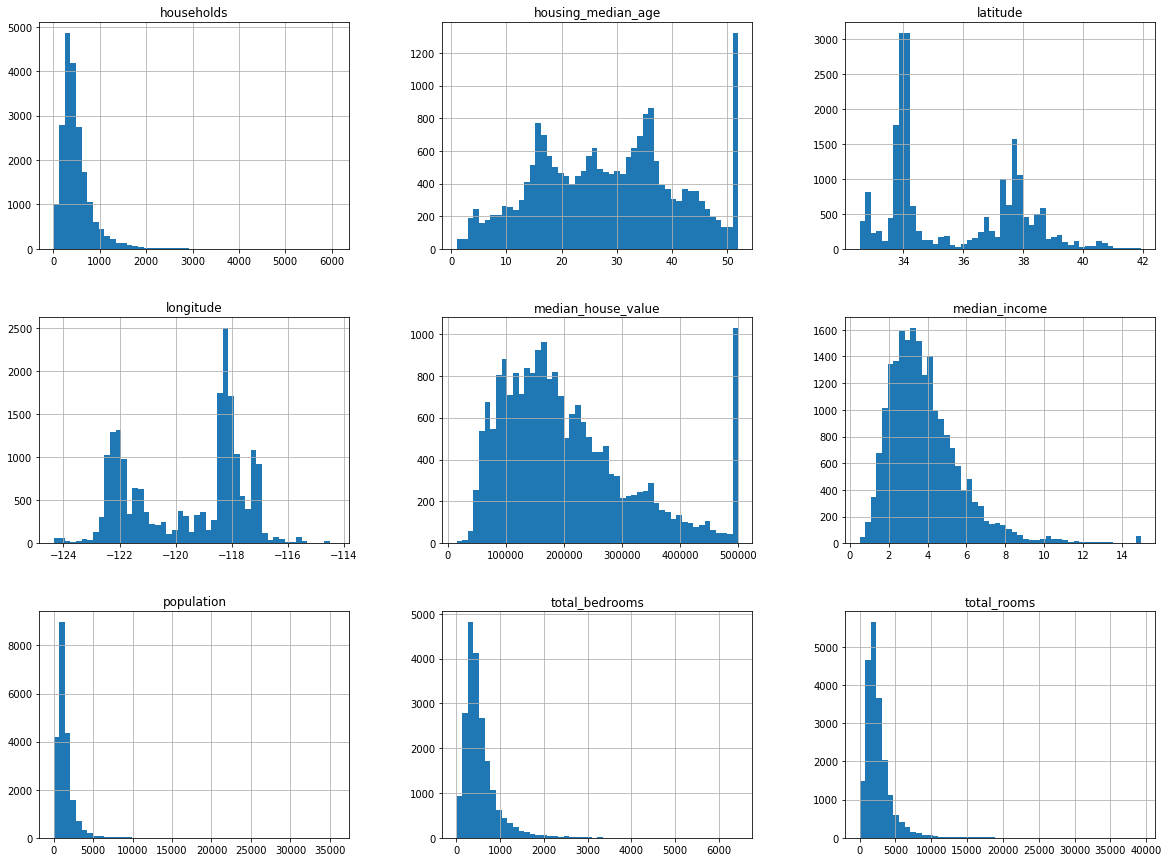

In [81]:
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20,15))
plt.show()

In [82]:
import numpy as np

    
def split_train_test(data, test_ratio):
    #use numpy to obtain an array of permutation from 0 to len(data)-1 inclusive
    shuffled_indices = np.random.permutation(len(data))
    
    #set test_set_size to be a ratio of the total set determined by test_ratio 
    test_set_size = int(len(data) * test_ratio)

    #test_indices is the portion of shuffled_indices' from beginning up to test_set_size
    test_indices = shuffled_indices[:test_set_size]
    
    #test_indices is the portion of shuffled_indices' from beginning up to test_set_size
    train_indices = shuffled_indices[test_set_size:]
    
    #return two sublists of data with traning indices and test_indices
    return data.iloc[train_indices], data.iloc[test_indices]

##### Caution #####
#  This method of splitting data depends on randomly generated permutation of indices
#  which means that training data and testing data will be different every time.
#  Over many iterations, the model being trained by the traning set will have seen all of the 
#  housing data which may cause over fitting. Its like giving test but using the same
#  Question as the review.
#  A random seed can be used to prevent issue metioned above but also woud fail when the 
#  data set upstream is updated with more or less rows of data.
   

In [83]:
# re-Generate these test set multiple times and see the difference in the sampled data 
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


In [84]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
7202,-118.18,34.02,37.0,2631.0,734.0,3228.0,701.0,2.1500,132200.0,<1H OCEAN
20406,-118.87,34.20,26.0,1924.0,245.0,775.0,244.0,7.0010,286800.0,<1H OCEAN
11401,-117.93,33.72,17.0,4461.0,585.0,2095.0,580.0,7.6709,319500.0,<1H OCEAN
6989,-118.04,33.97,29.0,2376.0,700.0,1968.0,680.0,2.6082,162500.0,<1H OCEAN
12032,-117.47,33.93,33.0,919.0,208.0,724.0,235.0,3.4028,110500.0,INLAND


In [85]:
#####
#  A better way to split data is to compute a hash for the identifier
#  of each entry of data.
#  Compute the hash and look at the last Byte
#  of the hash and check if it is under 51, which is roughly 20% of 256
#  This way, only ID that have certain hash ending will be put into the test_set.

import hashlib

# Check if the last Byte of the hash of this identifier is less than 256*test_ratio
def test_set_check(identifier, test_ratio, hash):
    #convert the identifier to a 64bit integer and compute the hash of it
    #Then digest the hash into 'chuncks' (bytes in this case I believe)
    #Then take the last element of the list and see if it is less than 256*test_ratio
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio


def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5): #use md5 for hash
    #obtain the index of each row
    ids = data[id_column]
    #use lambda function to wrap test-set_check above allow inline function without forloop
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    #in_test_set is a boolean array indicating which entry should be in test_set
    return data.loc[~in_test_set], data.loc[in_test_set]

In [86]:
housing_with_id = housing.reset_index()   # add an 'index' column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [87]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
11,11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY
20,20,-122.27,37.85,40.0,751.0,184.0,409.0,166.0,1.3578,147500.0,NEAR BAY
23,23,-122.27,37.84,52.0,1688.0,337.0,853.0,325.0,2.1806,99700.0,NEAR BAY


In [88]:
#  also can use the split function with the sklearn library 

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42) #random_state is like random seed

In [89]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


In [90]:
######
#  We have been using random numbers or some huristics to determine
#  how the data would be splitted. But often with small data size
#  we need to sample the data strategically to ensure that the sample
#  that we have collected are a good representation of the actual data
#  and we really can't do that by using just random numbers and huristic.
#  This requires more feature engineering and insight of the data.

#add a column: income_cat, which is derived from dividing the medium_income into multiple categories
housing["income_cat"] = np.ceil(housing["median_income"]/1.5)

#Contain only values that are less than 5 and merge entries that are highers than 5 into category 5.0
housing["income_cat"].where(housing["income_cat"]<5, 5.0, inplace=True)

#shows the percentage of each income catagory
                                                                            #housing["income_cat"].value_counts()
housing["income_cat"].value_counts()/len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [92]:
#use sklearn library to strategically split the data

from sklearn.model_selection import StratifiedShuffleSplit

#Declare some parameters for the 'splitter' 
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

#using the splitter to split the housing data set index into train and test based on income_cat
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    
    strat_train_set = housing.loc[train_index]
    strat_test_set  = housing.loc[test_index]
    
#Delete the income_cat colunm after we are done splitting
for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis=1, inplace=True)

housing = strat_train_set.copy()

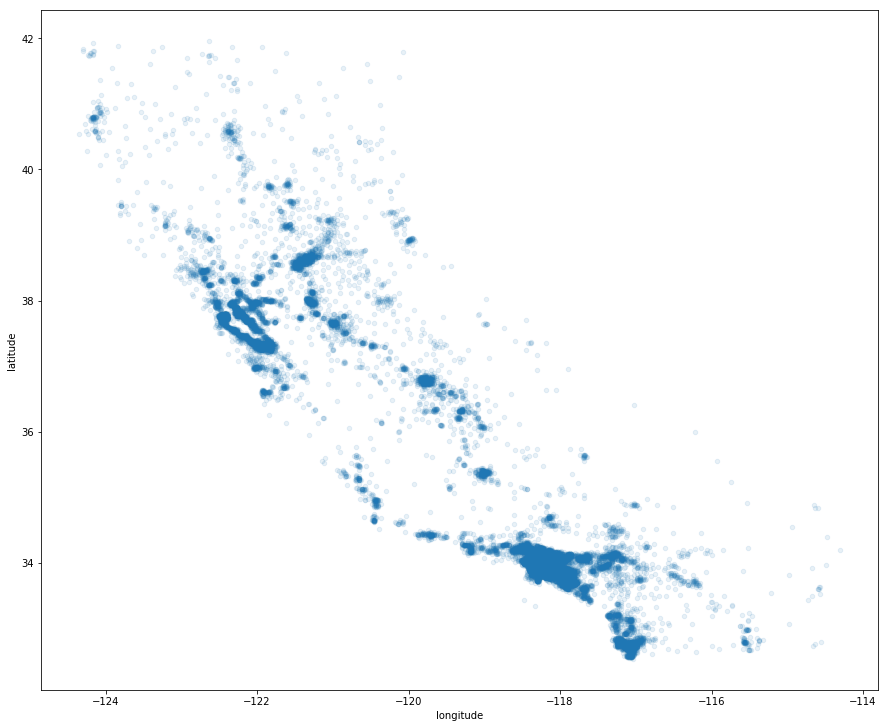

In [93]:
#plot a scatter plot of the longitude vs latitude in the housing data.
#set alpha to 0.1 to help visualize where the data overlapped the most(or have the most density)
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1, figsize=(15,12.5))
plt.show()

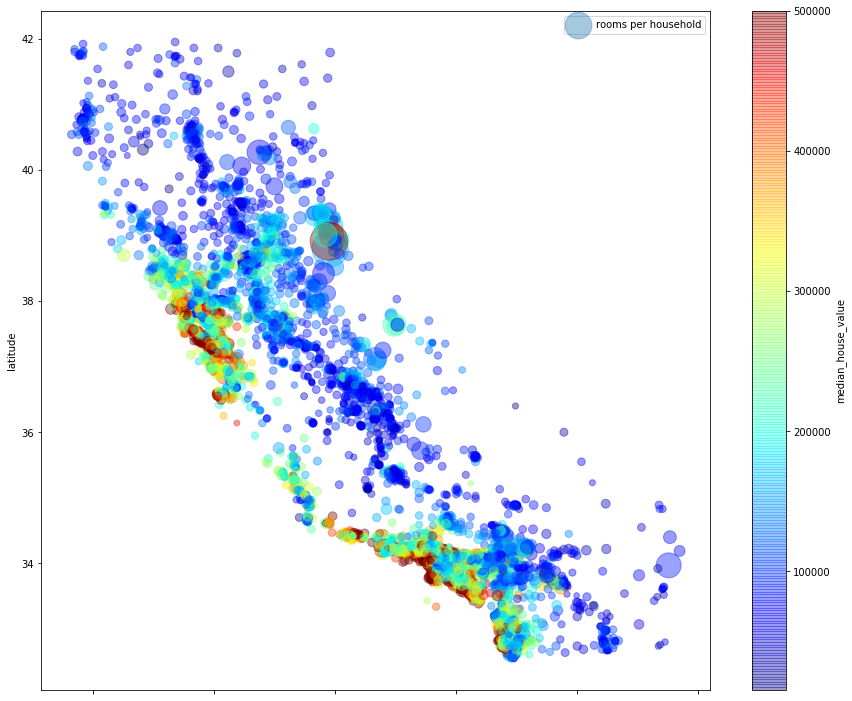

In [94]:
# plot another scatter plot with x as logitude and y as latitude
# setalpha to 0.4 to help with visualizing data density
# used s(size) to shoud population of each data entry
# used cmap to visualize the housing price with blue=low price and red=high price
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
                s=housing["total_rooms"]/housing["households"]*10, label="rooms per household",
                c="median_house_value",  cmap=plt.get_cmap("jet"), colorbar=True,
                figsize=(15,12.5)
            )
plt.show()

#From this plot we can see many informations:
#the price in central vally is significantly cheaper than the bay areas
#housing price in the bay areas are highest around san fancisco and los angles

In [95]:
#A correlation matrix showing the correlation between each colum and row
#The disgonal is always one for correlation with self
corr_matrix = housing.corr()
print (corr_matrix)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924478           -0.105848     0.048871   
latitude            -0.924478  1.000000            0.005766    -0.039184   
housing_median_age  -0.105848  0.005766            1.000000    -0.364509   
total_rooms          0.048871 -0.039184           -0.364509     1.000000   
total_bedrooms       0.076598 -0.072419           -0.325047     0.929379   
population           0.108030 -0.115222           -0.298710     0.855109   
households           0.063070 -0.077647           -0.306428     0.918392   
median_income       -0.019583 -0.075205           -0.111360     0.200087   
median_house_value  -0.047432 -0.142724            0.114110     0.135097   

                    total_bedrooms  population  households  median_income  \
longitude                 0.076598    0.108030    0.063070      -0.019583   
latitude                 -0.072419   -0.115222   -0.077647      -0.075205   
housing_

In [96]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

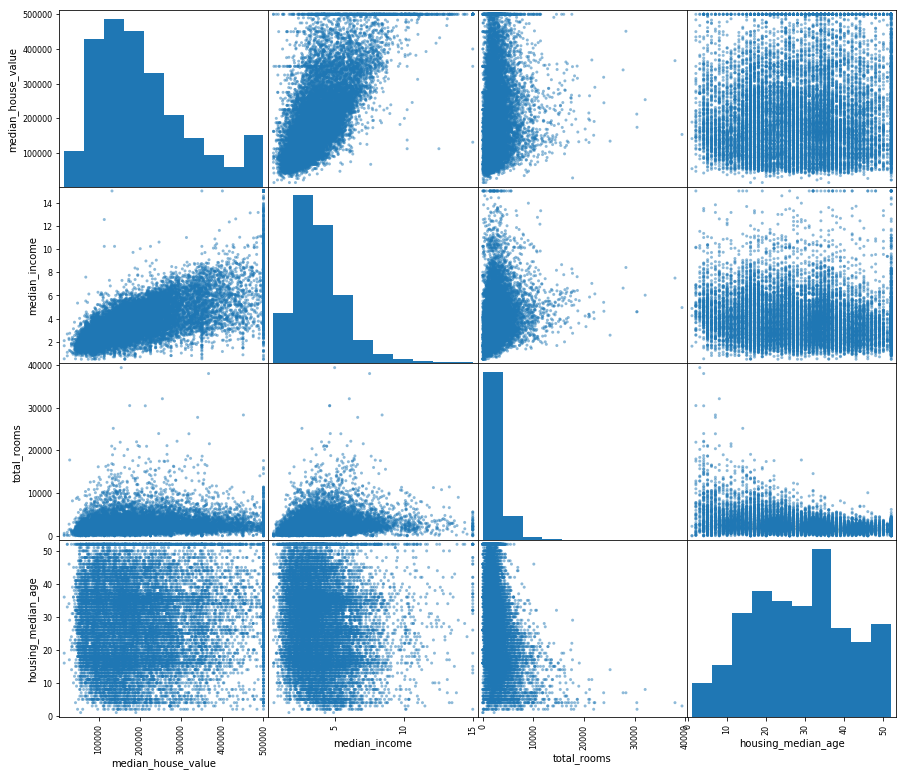

In [97]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

scatter_matrix(housing[attributes], figsize=(15, 13))
plt.show()

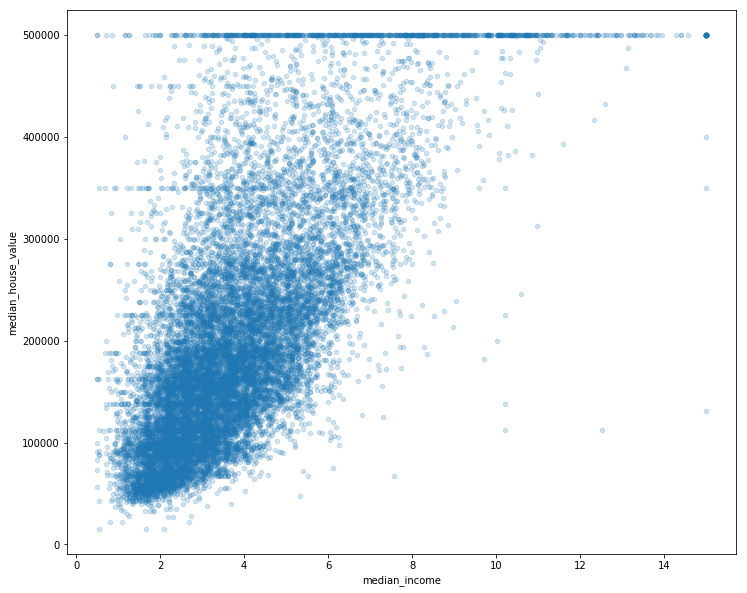

In [98]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.2, figsize=(12,10))
plt.show()

#From the plot we can definitly see the positive correlation between
#the median_income and median_housing_value, rich people generally live
#in better houses. There are many data that are capped at 500000 
#and several more capped price though out the graph. 
#These data points might need to be removed inorder to prevent some overfitting 

In [99]:
#often more informative information can be drived by combining 
#the original attributes from the data table. 
#such as population per household, rooms per house hold etc
#By combining attributes we can derive more useful information and more insights

housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_rooms"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

#rebuilt the correlation matrix
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_rooms         -0.259984
Name: median_house_value, dtype: float64

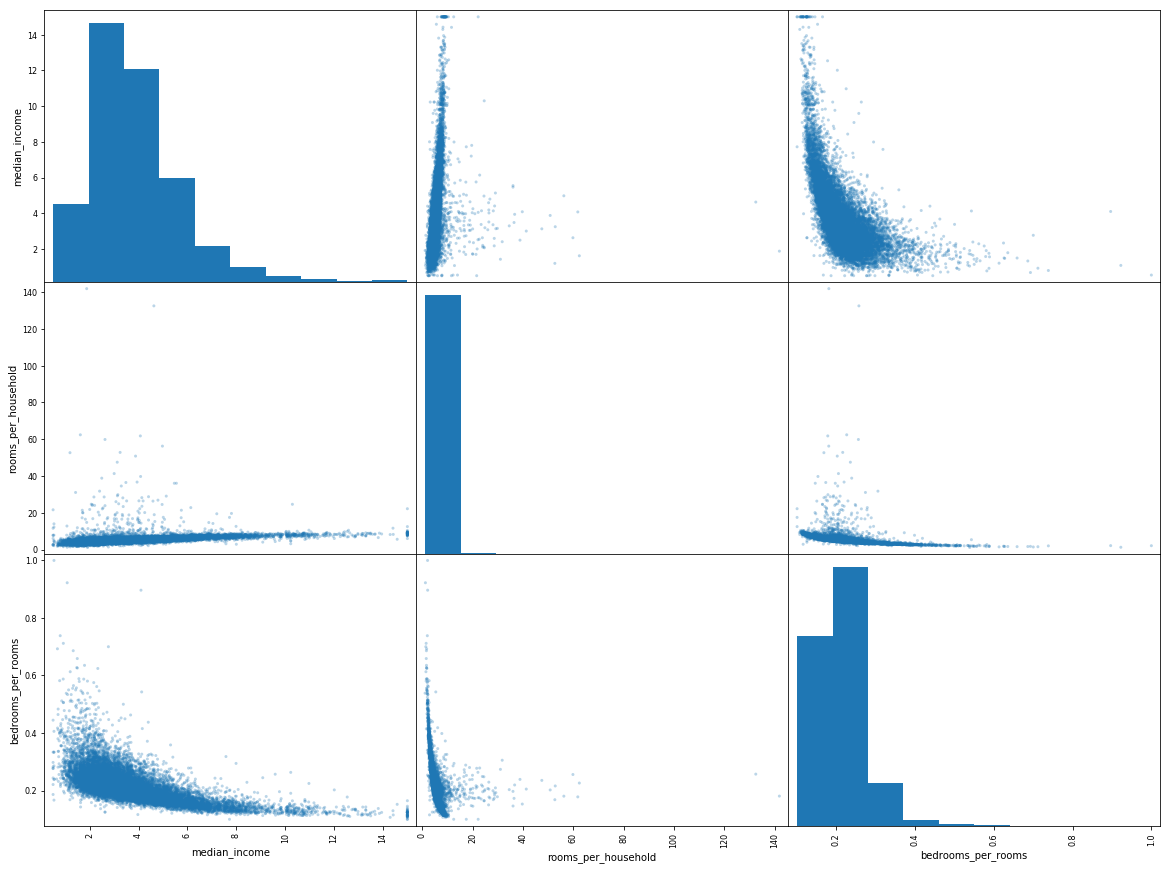

In [100]:
attributes=["median_income", "rooms_per_household", "bedrooms_per_rooms"]
scatter_matrix(housing[attributes], alpha=0.3, figsize=(20,15))
plt.show()


In [101]:
#Removing the median_house_value column from housing
#drop() does not operates on the original table but instead creates an copy,
#protecting the original data from accidental tampering
#when analyzing, experimentinig with these data, always makesure that you have backups
housing = strat_train_set.drop("median_house_value", axis=1)
#Use the column median_housing_value as our lebel. The algorithm will be train 
#to predict this attribute given the rest of the data.
housing_labels = strat_train_set["median_house_value"].copy()
housing.head()

#Since most machine learning algorithm cannot work with data set wit missing values


#Three ways to do it:
#    housing.drop("total_bedrooms", axis=1)  This will completely drop the column with some empty values
#    housing["total_bedrooms"].fillna(median) This will fill the empty entry with the medium of the column
#    housing.dropna(subset=["total_bedrooms"]) Remove all rows that has an empty entry in the column

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [102]:
#Uses sklearn to filter out these empty entries

from sklearn.preprocessing import Imputer

#use the imputer library to fill in na with median of that column, but this only works with number
imputer = Imputer(strategy = "median")
#Drop the column for ocean_proximity since it contains texts
housing_num = housing.drop("ocean_proximity", axis=1)
#Fit imputer into housing_num, imputer will compute the median for each 
#column and then when needed can replace these values into the missing entry
imputer.fit(housing_num)

imputer.statistics_
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [103]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN
19480,-120.97,37.66,24.0,2930.0,588.0,1448.0,570.0,3.5395,INLAND
8879,-118.50,34.04,52.0,2233.0,317.0,769.0,277.0,8.3839,<1H OCEAN
13685,-117.24,34.15,26.0,2041.0,293.0,936.0,375.0,6.0000,INLAND
4937,-118.26,33.99,47.0,1865.0,465.0,1916.0,438.0,1.8242,<1H OCEAN
4861,-118.28,34.02,29.0,515.0,229.0,2690.0,217.0,0.4999,<1H OCEAN


In [104]:
# Definition of the CategoricalEncoder class, copied from PR #9151.
# Just run this cell, or copy it to your code, do not try to understand it (yet).

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [105]:
from sklearn.preprocessing import LabelEncoder

#encodes the text and catagorical data into numeric catagories
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3])

In [106]:
from sklearn.preprocessing import  OneHotEncoder

#Encode the numerical catagories into one-hot form
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot.toarray()

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       ..., 
       [ 0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.]])

In [107]:
#from sklearn.preprocessing import CategoricalEncoder # in future versions of Scikit-Learn

#Combinging
cat_encoder = CategoricalEncoder()
housing_cat_reshaped = housing_cat.values.reshape(-1, 1)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_reshaped)
housing_cat_1hot.toarray()

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       ..., 
       [ 0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.]])

In [108]:
#We want to implement a custom transformer that can be used to add combined attributes to our dataset

from sklearn.base import BaseEstimator, TransformerMixin

room_ix, bedroom_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder (BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self  #we are not inplementing the fit function 
    
    def transform(self, X, y=None):
        #we first calculates the rooms_perhousehold and population_per_household through the 
        #same method we used earlier when we were exploring these combined attributes
        rooms_per_household = X[:, room_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        
        #If the instance of this transformer created was specifed to add bedrooms_per_room
        #then we will need to calculate that as well and return the concatenation of the four dataset 
        if self.add_bedrooms_per_room :
            bedrooms_per_room = X[:, bedroom_ix] / X[:, room_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        #else we can just return the concatenation  of the imput dataset X, and the combined attribute
        #along the second axis, or in other word stack rm/hshold and pop/hshold as new columns
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
print(housing_extra_attribs)

[[-121.89 37.29 38.0 ..., '<1H OCEAN' 4.625368731563422 2.094395280235988]
 [-121.93 37.05 14.0 ..., '<1H OCEAN' 6.008849557522124 2.7079646017699117]
 [-117.2 32.77 31.0 ..., 'NEAR OCEAN' 4.225108225108225 2.0259740259740258]
 ..., 
 [-116.4 34.09 9.0 ..., 'INLAND' 6.34640522875817 2.742483660130719]
 [-118.01 33.82 31.0 ..., '<1H OCEAN' 5.50561797752809 3.808988764044944]
 [-122.45 37.77 52.0 ..., 'NEAR BAY' 4.843505477308295 1.9859154929577465]]


In [109]:
housing[["longitude", "latitude", "total_rooms"]].head()

,longitude,latitude,total_rooms
17606,-121.89,37.29,1568.0
18632,-121.93,37.05,679.0
14650,-117.20,32.77,1952.0
3230,-119.61,36.31,1847.0
3555,-118.59,34.23,6592.0


In [110]:
from sklearn.base import BaseEstimator, TransformerMixin

#Creating this DataFrameSelector class to help select the wanted attributes from our data.
#when instanciated, the class will take in paramerter the names of the attribute that we
#want to extract from our data.
#when transform is called, the instance will return the value of the data that are under the desired attribute
#This is useful for when we want to focus on transforming specific data without manually extrract the columns.

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [111]:
#Building a transformation pipeline can aid the processing of the data in an automated sequence

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion

num_attribs = list(housing_num)     #our numeric attributes were derived earlier by dropping the ocean proximity column
                                    #We transform that into a list of attributes
    
cat_attribs = ["ocean_proximity"]   #our catagorical attributes are the ocean_proximity

#define the numerical transformation pipeline
num_pipeline = Pipeline([
    
    ('selector', DataFrameSelector(num_attribs)),  #first we select which set of data we want to work with note that the
                                                  #housing data set we pass in have both catagorical and numerical data
    ('imputer', Imputer(strategy="median")),      #then we need to fill in the empty entry with median of the column
    ('attribs_adder', CombinedAttributesAdder()), #then we need to add some combined attributes to out data
    ('std_scaler', StandardScaler()),             #and atlast we need to standarlize out data (feature scaling)
])

#define the catagorical transformation pipeline
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('categorical_encoder', CategoricalEncoder(encoding="onehot-dense")),
])

#combine the two pipeline together using FeatureUnion
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])

#housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_prepared = full_pipeline.fit_transform(housing)

In [112]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ..., 
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [113]:
housing_prepared.shape

(16512, 16)

In [114]:
## Whats done sofar was the processing and preparing of data:
#  - we visualized the data with graphs and gained some insights
#  - we analyzed the data with some statistical numbers to see correlations
#  - we then split the data into a traning set and a testing/label set
#  - we then done some smal feature engineering, added some extra datas derived from the original datas
#    and stadarized the numerical and catagrical datas.

## Now we need to train a model to see the result

In [137]:
from sklearn.linear_model import LinearRegression

#train a linear regression model with the dataset
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [138]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [ 210644.60459286  317768.80697211  210956.43331178   59218.98886849
  189747.55849879]


In [139]:
print('Labels: ', list(some_labels))

#Observe the results, it is not really good, the las two prediction are way off

Labels:  [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [140]:
from sklearn.metrics import mean_squared_error

#Calculate the mean square error between the predictions of our model and the labels

#get the prediction from our trained linear rgression model
housing_predictions = lin_reg.predict(housing_prepared)

#compute the mean squared errors between the prediction and the labsls
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)   #compute the square root to undo the squared
lin_rmse


##Observe the result, the square_root error is still very big

68628.198198489219

In [141]:
np.mean(housing_labels)

206990.92072432171

In [142]:
np.std(housing_labels)

115699.51117337927

In [144]:
from sklearn.tree import DecisionTreeRegressor

#try to train another model, using a decision tree model this time
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [145]:

#Try the trained model with our traning data, if even this data returns big errors, then there is no point in 
#testing this model with the real testing data
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

#Observe the result, the error of 0 is too good to be true, the model probably overfitted the data

0.0

In [150]:
#Since we do not want the testint set to be touch unless we are pretty sure that our model works
#We should use parts of the traning set as our validation set to see if out model seems to works
#we can use train_test_split to furthur split our data into the traning set and the validation sets
#we can then train the model with the traning set and then validate it with the validation set

#also we can use the cfoss-validation feature from scikit-learn

from sklearn.model_selection import cross_val_score

#here we perform a 10 fold cross-validation, it splits the testng set into 10 distinct subsets
#it trains the tree regressor 10 times with each one of the subset and validate the trained model with the
# rest of the 9 subsets. in this code, we use neg_mean_squared_error because cross_validation expects a utility function
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [151]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

#Observe the score, the tree is overfitted so fad it has a worst score than the linear regression

Scores: [ 68996.43398366  67919.00843078  71167.10910223  69183.82669551
  70512.68181908  74614.5902346   70778.1759048   71003.37133157
  77707.39531356  69256.73134348]
Mean: 71113.9324159
Standard deviation: 2794.34226914


In [153]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

display_scores(lin_rmse_scores)

Scores: [ 66782.73843989  66960.118071    70347.95244419  74739.57052552
  68031.13388938  71193.84183426  64969.63056405  68281.61137997
  71552.91566558  67665.10082067]
Mean: 69052.4613635
Standard deviation: 2731.6740018


In [154]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [155]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

21941.911027380233

In [156]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

#the rmse score is still much lower than the cross validation, which implies that the model
#still overfits the train sets 

Scores: [ 51650.94405471  48920.80645498  52979.16096752  54412.74042021
  50861.29381163  56488.55699727  51866.90120786  49752.24599537
  55399.50713191  53309.74548294]
Mean: 52564.1902524
Standard deviation: 2301.87380392


In [157]:
#Fine Tuning the models

from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'n_estimators': [3, 10], 'max_features': [2, 3, 4], 'bootstrap': [False]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [158]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [159]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)